<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


# Human Activity Recognition


dataset 출처 : https://archive.ics.uci.edu/ml/datasets.php

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
feature_name_df = pd.read_csv('./data/UCI_HAR_Dataset/features.txt', sep='\s+'
                            , header=None, names= ['column_index', 'column_name'])

In [20]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명중 10개 추출:', feature_name[:10])

전체 피처명중 10개 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


중복된 피처명을 확인

In [21]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())

column_index    42
dtype: int64


In [22]:
feature_dup_df[feature_dup_df['column_index']>1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


중복 컬럼명에 _n을 추가하는 함수 작성

In [23]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_featrure_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
    new_feature_name_df['coulumn_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) 
                                                                                               if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_featrure_name_df.drop(['index'], axis=1)
    return new_feature_name_df

위의 함수는 공룡책에서 나온 함수인데 너무 복잡해서 와닫지가 않는다. 
함수명을 다시 해서 만들어 보겠다. 

In [30]:
feature_name['cnt']=feature_name.groupby('column_name').cumcount()

In [32]:
feature_name['column_name'] = feature_name[['column_name','cnt']].apply(lambda x: x[0] + '_' + str(x[1])
                                                                        if x[1]>=1 else x[0], axis=1)

In [38]:
(feature_name.column_name.value_counts()==1).sum()

561

In [43]:
feature_name = pd.read_csv('./data/UCI_HAR_Dataset/features.txt', sep='\s+'
                            , header=None, names= [ 'column_name'], index_col=0)

In [44]:
def get_new_feature_name(feature_name):
    feature_name['cnt']=feature_name.groupby('column_name').cumcount()
    feature_name['column_name'] = feature_name[['column_name','cnt']].apply(lambda x: x[0] + '_' + str(x[1])
                                                                    if x[1]>=1 else x[0], axis=1)
    feature_name.drop('cnt',inplace=True, axis=1)
    return feature_name

In [47]:
new_feature_name_df = get_new_feature_name(feature_name)
(new_feature_name_df.column_name.value_counts()==1).sum()

561

# 이제 데이터 셋을 로드해 볼까?!

In [53]:
# 퓨처 이름 중복 제거된 이름 가져오기
def get_human_dataset():
    feature_name = pd.read_csv('./data/UCI_HAR_Dataset/features.txt', sep='\s+'
                               , header=None, names= [ 'column_name'], index_col=0)

    new_feature_name_df = get_new_feature_name(feature_name)

    feature_name = new_feature_name_df['column_name'].values.tolist()

    X_train = pd.read_csv('./data/UCI_HAR_Dataset/train/X_train.txt', sep='\s+',names=feature_name)
    X_test = pd.read_csv('./data/UCI_HAR_Dataset/test/X_test.txt', sep='\s+',names=feature_name)

    y_train = pd.read_csv('./data/UCI_HAR_Dataset/train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv('./data/UCI_HAR_Dataset/test/y_test.txt', sep='\s+', names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

# 자료 훑어 보기

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [55]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

# 기본 모델 성능 확인

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=pred)
print('결정트리 평가 정확도: {:.4f}'.format(accuracy))
print('DecisionTree 기본 parmaeter:', dt_clf.get_params())

결정트리 평가 정확도: 0.8548
DecisionTree 기본 parmaeter: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


# GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

In [57]:
param_grid = {'max_depth':[6, 8, 10, 12, 16, 20, 24]}

gs = GridSearchCV(\
                 estimator=DecisionTreeClassifier(random_state=156),
                 cv=5, 
                 param_grid=param_grid,
                 scoring='accuracy',
                 verbose=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=True)

In [59]:
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(gs.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', gs.best_params_)


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [62]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(gs.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]


,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [63]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [69]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, 
                       param_grid=params, 
                       scoring='accuracy', 
                       cv=5, verbose=1,
                       n_jobs= multiprocessing.cpu_count())
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:   19.9s finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [70]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


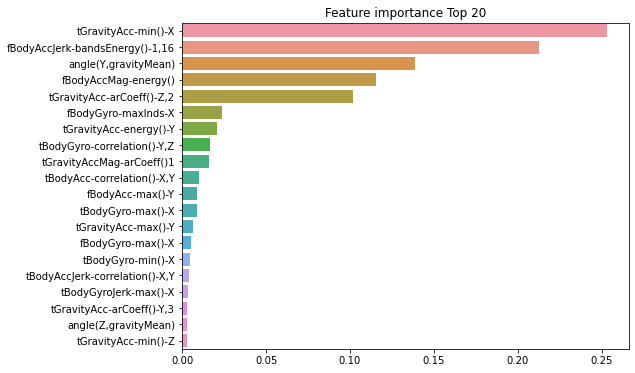

In [76]:
import seaborn as sns

fea_importance_values = best_df_clf.feature_importances_

f_importance = pd.Series(fea_importance_values, index=X_train.columns)

f_importance = f_importance.sort_values(ascending=False)

top_20 = f_importance[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importance Top 20')
sns.barplot(x=top_20, y = top_20.index)
plt.show()

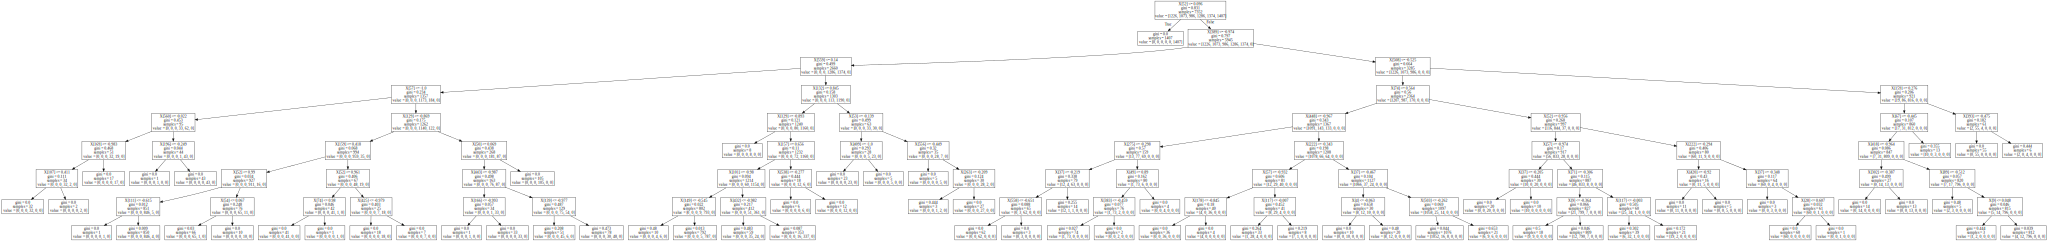

In [77]:
from sklearn.tree import export_graphviz
import graphviz
dot_graph = export_graphviz(best_df_clf)

graph = graphviz.Source(dot_graph)
graph

**Reference**

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>
* 파이썬 머신러닝 완벽 가이드, 권철민